<a href="https://colab.research.google.com/github/e-albuquerque/Mecmat-1/blob/main/Viga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade Sympy

     |████████████████████████████████| 5.9MB 4.7MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


# Exemplo 1

Uma viga cantilever de 9 metros de comprimento tem uma carga constante distribuída de 8 kN / m aplicada para baixo a partir da extremidade fixa em uma distância de 5 metros. Um momento anti-horário de 50 kN-m é aplicado a 5 metros da extremidade fixa. Por último, uma carga pontual, apontando para baixo, de 12 kN é aplicada na extremidade livre da viga.

Veja o desenho na célula seguinte

In [ ]:
#
#      y
#      ^
#      |
#  \\\\|
#  \\\\|    8 kN/m
#  \\\\|_________________
#  \\\\|| | | | | | | | |             12 kN
#  \\\\|V V V V V V V V V               |
#  \\\\|________________|_______________V
#  \\\\|                |               |
#  \\\\o - - - - - - - -⭯ 50 kN-m - - - | - - -> x
#  \\\\|________________|_______________|
#  \\\\|                                :
#  \\\\|----------------|---------------|
#             5.0 m            4.0 m
#

In [ ]:
from sympy import init_printing
init_printing(use_unicode=True, wrap_line=False)
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols
x, y, z = symbols('x y z')
E, I = symbols('E, I')
b = Beam(9, E, I)   # Beam(comprimento,E,I)
b.apply_load(-12, 9, -1)
b.apply_load(-8, 0, 0, end=5)
b.apply_load(50, 5, -2)
b.bc_deflection.append((0, 0))
b.bc_slope.append((0, 0))
R, M = symbols('R, M')
b.apply_load(R, 0, -1)
b.apply_load(M, 0, -2)
b.solve_for_reaction_loads(R, M)

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:1486: RuntimeWarning: invalid value encountered in double_scalars
  cos_theta = dot_product / (vector_a_norm * vector_b_norm)


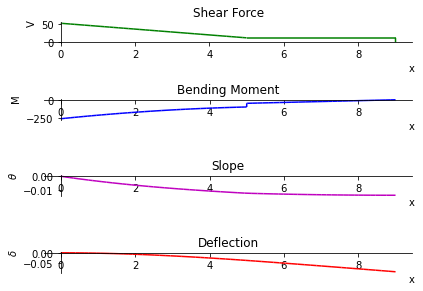

In [ ]:
b.plot_loading_results(subs={E: 20E9, I: 3.25E-6})

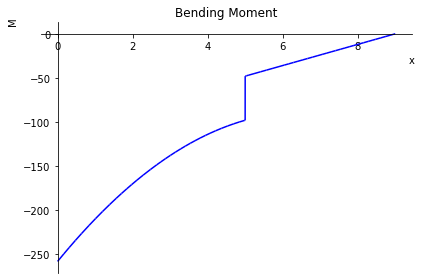

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:1486: RuntimeWarning: invalid value encountered in double_scalars
  cos_theta = dot_product / (vector_a_norm * vector_b_norm)


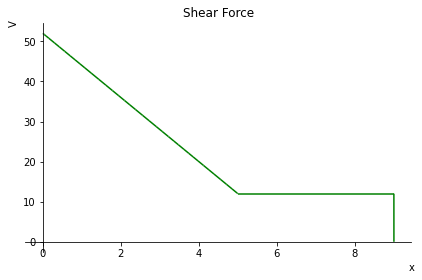

In [ ]:
b.plot_bending_moment()
b.plot_shear_force()  

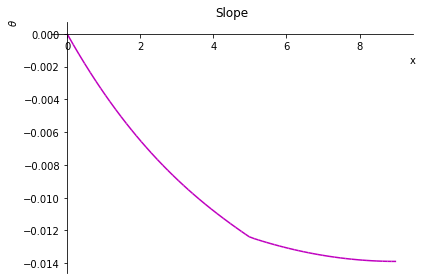

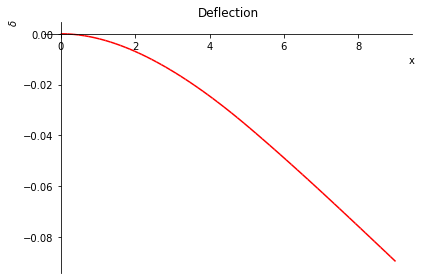

In [ ]:
b.plot_slope(subs={E: 20E9, I: 3.25E-6})  
b.plot_deflection(subs={E: 20E9, I: 3.25E-6})  

In [ ]:
b.reaction_loads

In [ ]:
b.load

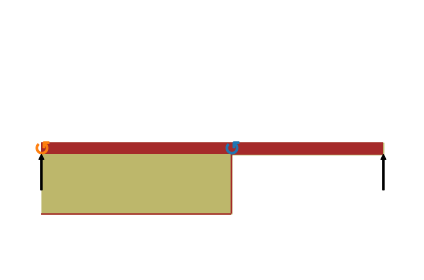

In [ ]:
p=b.draw()
p.show()

In [ ]:
b.boundary_conditions

{'deflection': [(0, 0)], 'slope': [(0, 0)]}

In [ ]:
b.shear_force()

In [ ]:
b.bending()

In [ ]:
print("Momento fletor máximo = ",b.max_bmoment())
print("Deflexão máxima = ",b.max_deflection())
print("Força cortante máxima = ",b.max_shear_force())

Momento fletor máximo =  (0, 258)
Deflexão máxima =  None
Força cortante máxima =  (Interval(0, 9), 12)


In [ ]:
b.point_cflexure()

In [ ]:
b.shear_stress()